# Assignment 7 - Linear Regression in Python with Statsmodels
Grayson Hineline

Note for portfolio: In this project, I use linear regression to try and predict fuel efficiency on a dataset of cars.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

Let's take a look at the data

In [2]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Looks like we got some nans, I'm going to get rid of those so the regressions can work right.

In [4]:
mpg = mpg.dropna()

In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Right away I can tell that the 'name' column would be difficult to convert to numerical values, but the origin category does not seem like it would be hard. Let's do that.

In [6]:
pd.get_dummies(mpg["origin"])

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [7]:
mpg = mpg.join(pd.get_dummies(mpg["origin"]))
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,0,1


Now that I have these numerical columns, I'm going to drop the non-numeric columns.

In [8]:
mpg = mpg.drop(columns= ["origin", 'name'])
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


From my describe earlier I can also tell that all of the model year values are between 70 and 82, so I'm going to replace that column with a new column that starts at 0 years, and call it 'years after 1970'.

In [9]:
mpg['model_year'] = mpg['model_year'] - 70
mpg.rename(columns={'model_year' : "years after 1970"}, inplace = True)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,12,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,12,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,12,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,12,0,0,1


Now that we're processed the df a bit, I want to quickly look at the corrlations and a scatter mattrix to see basic relationships between the various features, which will come in handy in developing my regression.

In [10]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
years after 1970,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


Displacement, horsepower, cylinders, displacement and weight (all things to do with the 'muscle' of the car) are all highly negatively correlated with mpg, and furthermore are all highly positively correlated with one another. Thus, including one of them in the regression model may result in no need to include the others, because the included variable is predicting the same change in mpg as the other variables.

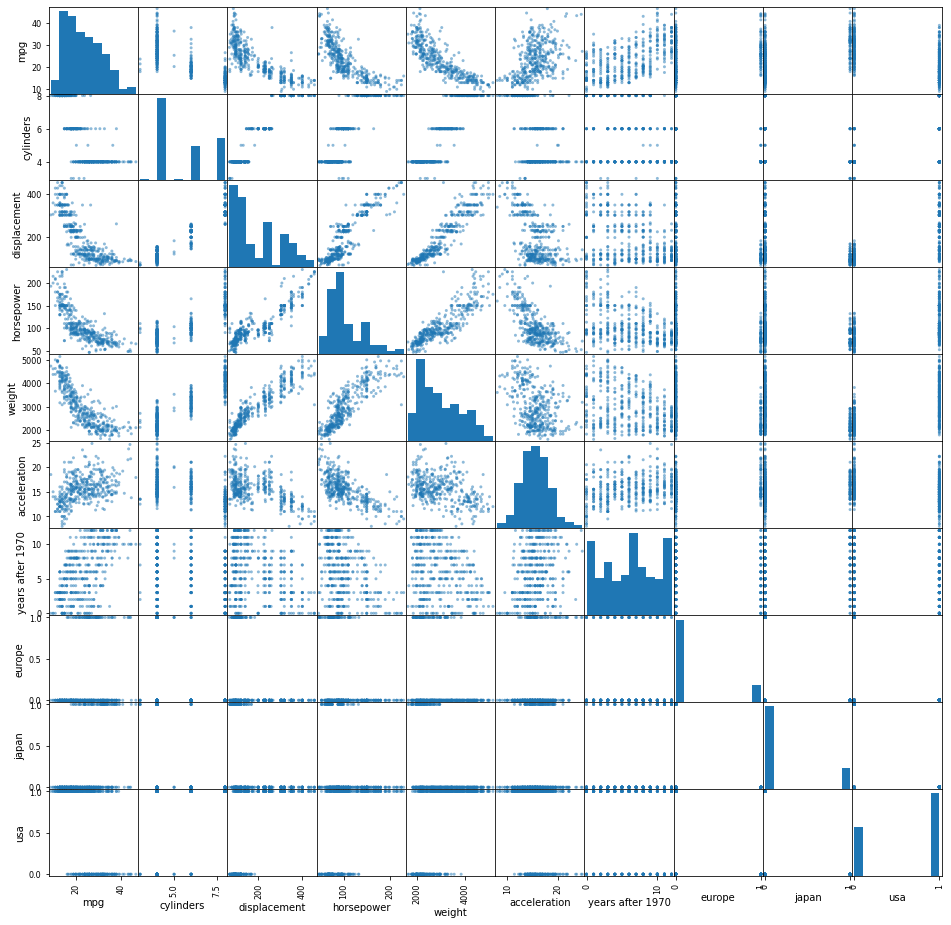

In [11]:
pd.plotting.scatter_matrix(mpg, figsize = (16,16));

Looks like there may be some non-linear relationships between some of the 'muscle' related features of a car. Lets take a closer look.

In [12]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'years after 1970', 'europe', 'japan', 'usa'],
      dtype='object')

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

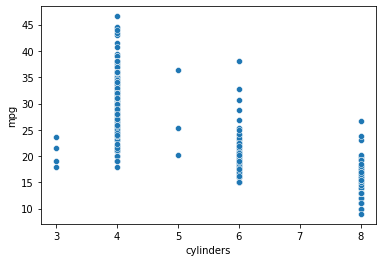

In [13]:
sns.scatterplot(data = mpg, x = 'cylinders', y = 'mpg')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

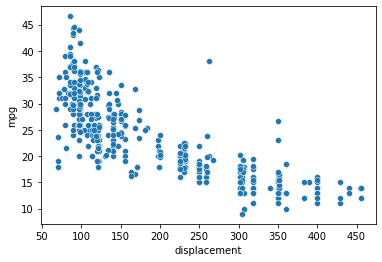

In [14]:
sns.scatterplot(data = mpg, x = 'displacement', y = 'mpg')

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

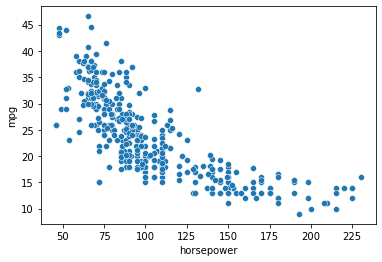

In [15]:
sns.scatterplot(data = mpg, x = 'horsepower', y = 'mpg')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

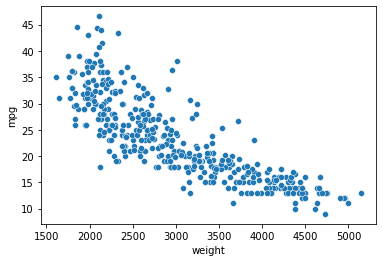

In [16]:
sns.scatterplot(data = mpg, x = 'weight', y = 'mpg')

Some of them look a little quadratic, but we'll test that later in the regression.

Now finally we're ready to do some regressions.

In [17]:
x = mpg.drop(columns = "mpg")
x

,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa
0,8,307.0,130.0,3504,12.0,0,0,0,1
1,8,350.0,165.0,3693,11.5,0,0,0,1
2,8,318.0,150.0,3436,11.0,0,0,0,1
3,8,304.0,150.0,3433,12.0,0,0,0,1
4,8,302.0,140.0,3449,10.5,0,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,12,0,0,1
394,4,97.0,52.0,2130,24.6,12,1,0,0
395,4,135.0,84.0,2295,11.6,12,0,0,1
396,4,120.0,79.0,2625,18.6,12,0,0,1


In [18]:
y = mpg["mpg"]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

I'm going to split my data the same way that it was done in the lab directions, that way our results can be compared more easily.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 250, train_size = 75, random_state = 67)

Now that we've done that, lets just through the kitchen sink of the training data at the y training data and see what happens.

In [20]:
x = x_train
y = y_train
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     55.43
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           2.45e-26
Time:                        13:22:17   Log-Likelihood:                -186.28
No. Observations:                  75   AIC:                             390.6
Df Residuals:                      66   BIC:                             411.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.0420      3.618      7.474      0.000      19.818      34.266
cylinders           -1.6662      0.712     -2.340      0.022      -3.088      -0.245
displacement         0.0164      0.017      0.947      0.347      -0.018       0.051
horsepower           0.0042      0.032      0.133      0.894      -0.059       0.067
weight              -0.0045      0.002     -2.956      0.004      -0.008      -0.001
acceleration         0.1649      0.224      0.736      0.464      -0.282       0.612
years after 1970     0.7474      0.116      6.457      0.000       0.516       0.979
europe               9.6174      1.257      7.650      0.000       7.107      12.127
japan               10.0760      1.447      6.966      0.000       7.188      12.964
usa                  7.3487      1.496      4.913      0.000       4.362      10.335
==============================================================================
Omnibus:                        3.518   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.079
Skew:                           0.496   Prob(JB):                        0.214
Kurtosis:                       3.054   Cond. No.                     3.13e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.48e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

^^ the above output is a standard thing from statsmodels, I didn't write this.

In [21]:
#The following computes the mean squared error.
ypred = model.predict(x)
rmseval = rmse(y, ypred)
rmseval

2.9002979421075485

A couple things do note:
The R2 (shown in the very top right, also known as the coefficient of determination) is pretty high at 0.87, and the root mean squared error is 2.900, which is pretty good considering that the standard deviation for mpg is 7.805 (as we saw earlier with the `describe` table. However, the p-values associated with many of the coefficients on the variables in the regression (which give the signifigance level at which one can reject the null hypothesis that the true parameter the estimated coefficient is trying to guess is actually 0) are above 0.10 for a few of the coefficients, meaning that those coefficients are statistically insignifigant. Accelaration makes sense to be one of these insiginicant estimators because it was only weekly correlated with mpg. Between the 'muscle' features we discussed earlier that we know are all correlated with mpg, only cylinders and weight proved to be siginifigant at the 5% level. Even though all of them are probably great estimators of mpg, including all of them in the regression makes some of them insignifigant because they are both correlated with each other and the dependant variable.

Lets do another regression but including only the variables that were signifigant.

In [22]:
x = x_train[["cylinders", 'weight', 'years after 1970', 'usa','europe', 'japan']]
x = sm.add_constant(x)
y = y_train
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     90.67
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           6.13e-29
Time:                        13:22:17   Log-Likelihood:                -187.01
No. Observations:                  75   AIC:                             386.0
Df Residuals:                      69   BIC:                             399.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.8700      1.533     18.177      0.000      24.811      30.929
cylinders           -1.3487      0.527     -2.559      0.013      -2.400      -0.297
weight              -0.0033      0.001     -3.383      0.001      -0.005      -0.001
years after 1970     0.7278      0.110      6.625      0.000       0.509       0.947
usa                  7.7866      1.077      7.232      0.000       5.639       9.935
europe               9.7729      0.662     14.772      0.000       8.453      11.093
japan               10.3105      0.790     13.058      0.000       8.735      11.886
==============================================================================
Omnibus:                        7.820   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.305
Skew:                           0.644   Prob(JB):                       0.0259
Kurtosis:                       3.823   Cond. No.                     3.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
ypred = model.predict(x)
rmseval = rmse(y, ypred)
rmseval

2.9285591723671396

Although the R2 value went down by 0.02, all of our coefficients became siginifigant at the 5% level. This model seems to be pretty good, but I want to do some more to compare them all.

In [24]:
#excluding cylinders
x = x_train[['weight', 'years after 1970', 'usa','europe', 'japan']]
x = sm.add_constant(x)
y = y_train
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.26e-28
Time:                        13:22:17   Log-Likelihood:                -190.41
No. Observations:                  75   AIC:                             390.8
Df Residuals:                      70   BIC:                             402.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               26.5405      1.499     17.711      0.000      23.552      29.529
weight              -0.0054      0.001     -8.864      0.000      -0.007      -0.004
years after 1970     0.8054      0.110      7.344      0.000       0.587       1.024
usa                  6.9994      1.072      6.530      0.000       4.861       9.137
europe               9.6625      0.686     14.089      0.000       8.295      11.030
japan                9.8786      0.801     12.328      0.000       8.280      11.477
==============================================================================
Omnibus:                        4.812   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.103
Skew:                           0.554   Prob(JB):                        0.129
Kurtosis:                       3.294   Cond. No.                     3.20e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.11e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
ypred = model.predict(x)
rmseval = rmse(y, ypred)
rmseval

3.0643311399724165

Excluding cylinders doesn't seem to be right, so lets leave it.

Since weight is so massive comparative to the other variables, I want to see what happens if I convert it into a z-score.

In [26]:
x_train['weight z-scores'] = (x_train['weight'] - x_train['weight'].mean()) / x_train['weight'].std()
x_train

<ipython-input-26-5e6f17859288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight z-scores'] = (x_train['weight'] - x_train['weight'].mean()) / x_train['weight'].std()


,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa,weight z-scores
289,8,350.0,155.0,4360,14.9,9,0,0,1,1.498232
66,8,304.0,150.0,3672,11.5,2,0,0,1,0.752102
98,6,250.0,100.0,3278,18.0,3,0,0,1,0.324812
264,8,302.0,139.0,3205,11.2,8,0,0,1,0.245644
151,4,79.0,67.0,2000,16.0,4,1,0,0,-1.061167
...,...,...,...,...,...,...,...,...,...,...
8,8,455.0,225.0,4425,10.0,0,0,0,1,1.568724
348,4,89.0,62.0,2050,17.3,11,0,1,0,-1.006943
145,4,83.0,61.0,2003,19.0,4,0,1,0,-1.057914
99,6,232.0,100.0,2945,16.0,3,0,0,1,-0.036323


Now lets try it again:

In [27]:
#I changed these variables to have 1's after them such that I can use them later on
x1 = x_train[['weight z-scores', 'cylinders', 'years after 1970', 'usa','europe', 'japan']]
x1 = sm.add_constant(x1)
y = y_train
model1 = sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     90.67
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           6.13e-29
Time:                        13:22:17   Log-Likelihood:                -187.01
No. Observations:                  75   AIC:                             386.0
Df Residuals:                      69   BIC:                             399.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.4253      2.358      8.663      0.000      15.722      25.129
weight z-scores     -3.0730      0.908     -3.383      0.001      -4.885      -1.261
cylinders           -1.3487      0.527     -2.559      0.013      -2.400      -0.297
years after 1970     0.7278      0.110      6.625      0.000       0.509       0.947
usa                  5.3050      1.121      4.732      0.000       3.069       7.541
europe               7.2913      0.946      7.711      0.000       5.405       9.178
japan                7.8289      1.067      7.336      0.000       5.700       9.958
==============================================================================
Omnibus:                        7.820   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.305
Skew:                           0.644   Prob(JB):                       0.0259
Kurtosis:                       3.823   Cond. No.                     9.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

It's essentially the same output as before when cylinders was included too, which makes sense.

Lastly, I want to try a feature transformation. I saw that maybe, just maybe weight had a quadratic relationship with mpg, so lets try that.

In [28]:
x_train['weight z2'] = x_train['weight z-scores']*x_train['weight z-scores']
x_train['weight z2']

<ipython-input-28-6912776781ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weight z2'] = x_train['weight z-scores']*x_train['weight z-scores']


289    2.244699
66     0.565657
98     0.105503
264    0.060341
151    1.126076
         ...   
8      2.460894
348    1.013934
145    1.119182
99     0.001319
94     3.628705
Name: weight z2, Length: 75, dtype: float64

In [29]:
x2 = x_train[['weight z-scores', 'cylinders', 'weight z2', 'years after 1970', 'usa','europe', 'japan']]
x2 = sm.add_constant(x2)
y = y_train
model2 = sm.OLS(y,x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           3.33e-32
Time:                        13:22:17   Log-Likelihood:                -176.09
No. Observations:                  75   AIC:                             366.2
Df Residuals:                      68   BIC:                             382.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.4173      2.217      7.406      0.000      11.994      20.841
weight z-scores     -5.3421      0.922     -5.795      0.000      -7.182      -3.502
cylinders           -0.9324      0.467     -1.996      0.050      -1.865      -0.000
weight z2            1.9724      0.411      4.794      0.000       1.151       2.793
years after 1970     0.8149      0.097      8.368      0.000       0.621       1.009
usa                  5.2459      0.976      5.373      0.000       3.298       7.194
europe               5.4210      0.911      5.949      0.000       3.603       7.239
japan                5.7505      1.025      5.608      0.000       3.704       7.797
==============================================================================
Omnibus:                       12.926   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.857
Skew:                           0.782   Prob(JB):                     0.000360
Kurtosis:                       4.621   Cond. No.                     9.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
ypred = model2.predict(x2)
rmseval = rmse(y, ypred)
rmseval

2.531778268451688

Hey look at that! The coefficient on the squared z-scores was siginigant, and my R2 and my root mean squared error improved. This seems to be a good regression, but lets look at the residuals for both of the last 2 models.

In [31]:
model1predy = model1.predict(x1)
model1predy

289    16.886602
66     14.085199
98     18.823355
264    20.008082
151    28.493932
         ...    
8      10.120189
348    33.959202
145    29.021557
99     19.933134
94     11.270324
Length: 75, dtype: float64

In [32]:
df1 = pd.DataFrame()
df1["y_train"] = y_train
df1["model 1 prediction"] = model1.fittedvalues
df1['weight z-scores model 1'] = x1['weight z-scores']
df1['residuals'] = df1['y_train'] - df1['model 1 prediction']
df1.index = df1['weight z-scores model 1']
df1 = df1.drop(columns = "weight z-scores model 1")
df1

,y_train,model 1 prediction,residuals
weight z-scores model 1,,,
1.498232,16.9,16.886602,0.013398
0.752102,17.0,14.085199,2.914801
0.324812,16.0,18.823355,-2.823355
0.245644,18.1,20.008082,-1.908082
-1.061167,31.0,28.493932,2.506068
...,...,...,...
1.568724,14.0,10.120189,3.879811
-1.006943,37.7,33.959202,3.740798
-1.057914,32.0,29.021557,2.978443


In [33]:
df2 = pd.DataFrame()
df2["y_train"] = y_train
df2["model 2 prediction"] = model2.fittedvalues
df2['weight z-scores model 2'] = x2['weight z-scores']
df2['residuals'] = df2['y_train'] - df2['model 2 prediction']
df2.index = df2['weight z-scores model 2']
df2 = df2.drop(columns = "weight z-scores model 2")
df2

,y_train,model 2 prediction,residuals
weight z-scores model 2,,,
1.498232,16.9,17.961291,-1.061291
0.752102,17.0,12.931475,4.068525
0.324812,16.0,16.986202,-0.986202
0.245644,18.1,19.529511,-1.429511
-1.061167,31.0,29.257980,1.742020
...,...,...,...
1.568724,14.0,10.677389,3.322611
-1.006943,37.7,34.780619,2.919381
-1.057914,32.0,29.556476,2.443524


<AxesSubplot:xlabel='weight z-scores model 1'>

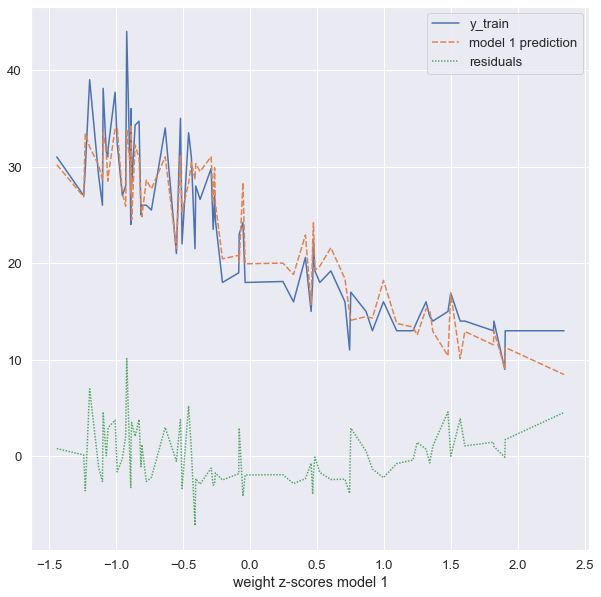

In [34]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_theme(font_scale = 1.2)
sns.lineplot(data = df1, ci = None) #linear model

<AxesSubplot:xlabel='weight z-scores model 2'>

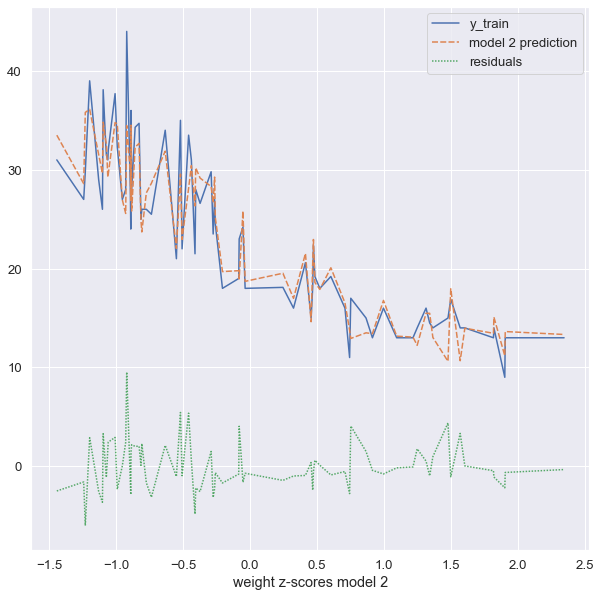

In [35]:
sns.lineplot(data = df2, ci = None) #quadratic model

After looking at the residuals, I'm going to go with the quadratic model.

**Extra Credit**:

Before I even test my model against my testing set, I'm going to get the extra credit ready. Given what I know from running these regressions, I'm pretty sure that if I do one and just exclude the model year of the car it will be pretty accurate. Let's try that:

In [36]:
x = x_train[['weight z-scores', 'weight z2']]
x = sm.add_constant(x)
y = y_train
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           4.43e-23
Time:                        13:22:17   Log-Likelihood:                -209.30
No. Observations:                  75   AIC:                             424.6
Df Residuals:                      72   BIC:                             431.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              21.9165      0.706     31.040      0.000      20.509      23.324
weight z-scores    -7.7542      0.553    -14.011      0.000      -8.857      -6.651
weight z2           1.4400      0.539      2.672      0.009       0.366       2.514
==============================================================================
Omnibus:                        8.920   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.496
Skew:                           0.743   Prob(JB):                       0.0143
Kurtosis:                       3.714   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look at that, R2 is already at 0.761. Let's introduce more engine features to see if we can make it better.

In [37]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'years after 1970', 'europe', 'japan', 'usa', 'weight z-scores',
       'weight z2'],
      dtype='object')

In [38]:
x = x_train[['weight z-scores', 'weight z2', 'cylinders', 'acceleration']]
x = sm.add_constant(x)
y = y_train
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     68.74
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.65e-23
Time:                        13:22:17   Log-Likelihood:                -203.11
No. Observations:                  75   AIC:                             416.2
Df Residuals:                      70   BIC:                             427.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.6144      6.069      4.385      0.000      14.510      38.719
weight z-scores    -4.6641      1.197     -3.895      0.000      -7.052      -2.276
weight z2           1.1787      0.512      2.300      0.024       0.157       2.201
cylinders          -1.6060      0.696     -2.308      0.024      -2.994      -0.218
acceleration        0.2969      0.207      1.433      0.156      -0.116       0.710
==============================================================================
Omnibus:                        4.317   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.815
Skew:                           0.550   Prob(JB):                        0.148
Kurtosis:                       3.113   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
ypred = model.predict(x)
rmseval = rmse(y, ypred)
rmseval

3.6297295840042274

Not as good as the model including the model year, but thats to be expected. What if I get rid of the squared weights term...

In [40]:
x = x_train[['weight z-scores', 'cylinders', 'acceleration']]
x = sm.add_constant(x)
y = y_train
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     84.77
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           2.06e-23
Time:                        13:22:18   Log-Likelihood:                -205.84
No. Observations:                  75   AIC:                             419.7
Df Residuals:                      71   BIC:                             428.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.8475      6.080      4.909      0.000      17.724      41.971
weight z-scores    -3.5706      1.132     -3.155      0.002      -5.827      -1.314
cylinders          -1.9060      0.704     -2.708      0.008      -3.309      -0.503
acceleration        0.2707      0.213      1.270      0.208      -0.154       0.696
==============================================================================
Omnibus:                        4.615   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.074
Skew:                           0.566   Prob(JB):                        0.130
Kurtosis:                       3.150   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It's worse, so lets just leave it.

Let's plot the residuals of this model real quick.

In [41]:
#remaking the quadratic model
x = x_train[['weight z-scores', 'weight z2', 'cylinders', 'acceleration']]
x = sm.add_constant(x)
y = y_train
modelEC = sm.OLS(y,x).fit()

dfEC = pd.DataFrame()
dfEC["y_train"] = y_train
dfEC["model EC prediction"] = modelEC.fittedvalues
dfEC['weight z-scores model EC'] = x['weight z-scores']
dfEC['residuals'] = dfEC['y_train'] - dfEC['model EC prediction']
dfEC.index = dfEC['weight z-scores model EC']
dfEC = dfEC.drop(columns = "weight z-scores model EC")
dfEC

,y_train,model EC prediction,residuals
weight z-scores model EC,,,
1.498232,16.9,13.847979,3.052021
0.752102,17.0,14.339460,2.660540
0.324812,16.0,20.931746,-4.931746
0.245644,18.1,16.016934,2.083066
-1.061167,31.0,31.217327,-0.217327
...,...,...,...
1.568724,14.0,12.319297,1.680703
-1.006943,37.7,31.218182,6.481818
-1.057914,32.0,32.084681,-0.084681


<AxesSubplot:xlabel='weight z-scores model EC'>

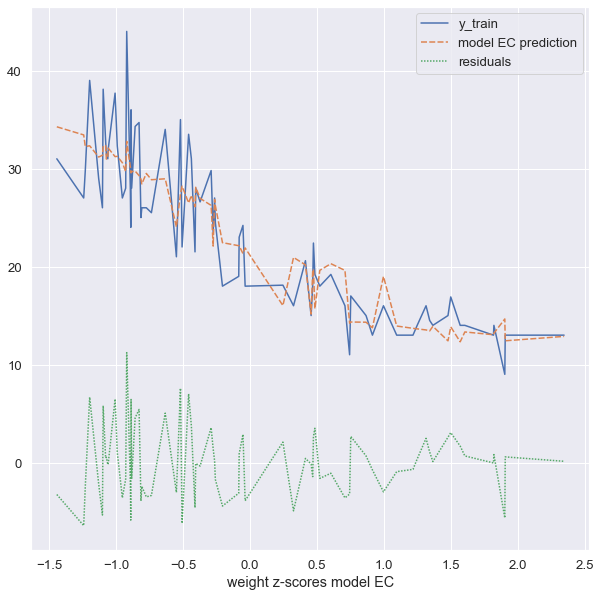

In [42]:
sns.lineplot(data = dfEC, ci = None)

Looks good!

# Part 2: Validation and Interpretation

Here is my prefered model based on the first part of the assignment.

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           3.33e-32
Time:                        13:22:18   Log-Likelihood:                -176.09
No. Observations:                  75   AIC:                             366.2
Df Residuals:                      68   BIC:                             382.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.4173      2.217      7.406      0.000      11.994      20.841
weight z-scores     -5.3421      0.922     -5.795      0.000      -7.182      -3.502
cylinders           -0.9324      0.467     -1.996      0.050      -1.865      -0.000
weight z2            1.9724      0.411      4.794      0.000       1.151       2.793
years after 1970     0.8149      0.097      8.368      0.000       0.621       1.009
usa                  5.2459      0.976      5.373      0.000       3.298       7.194
europe               5.4210      0.911      5.949      0.000       3.603       7.239
japan                5.7505      1.025      5.608      0.000       3.704       7.797
==============================================================================
Omnibus:                       12.926   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.857
Skew:                           0.782   Prob(JB):                     0.000360
Kurtosis:                       4.621   Cond. No.                     9.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I noticed once I got to the end of my analysis that there is a part of the lab that says to normalize my coefficients such that I can compared their weights in a bar plot. Let's do that now by remaking the model real quick with z-scores.

Interpretation of coefficients:


Note: all of these are to say "holding all else constant... this term increases/decreases mpg by this much".
* const: This is just a constant for the data, think of it as the b term in y = mx+b
* weight z-scores: an increase of z-score of 1 causes an decrease to the mpg of a car by -5.34.
* cylinders: one more cylinder in a car decreases mpg by -0.9324
* weight z2: increasing the the squared z-score of weight of a car by 1 increases car mpg by 1.97. (Note, this being slightly positive and 'weight z-scores' being negative is what causes the diminishing negative slope in the plots earlier)
* years after 1970: for every year after 1970, a cars mpg increases by 0.8149.
* usa, europe and japan: cars from the usa gain a 5.25 mpg increase, europe = +5.42mpg, and japan = +5.75mpg.

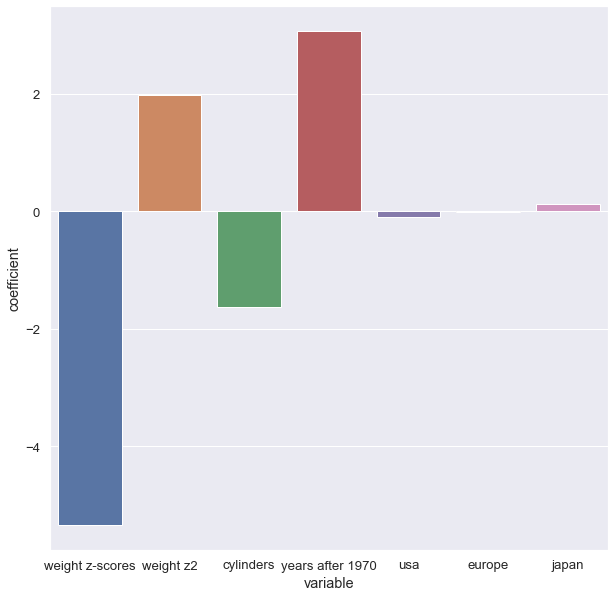

In [44]:
x_trainz = x_train.copy()
for col in x_trainz.columns[:9]: #only to the 8th index so we don't overwrite weight z scores
    x_trainz[col] = (x_trainz[col] - x_trainz[col].mean()) / x_trainz[col].std()

x2z = x_trainz[['weight z-scores', "weight z2", 'cylinders', 'years after 1970', 'usa','europe', 'japan']]
x2z = sm.add_constant(x2z)
y = y_train
model2z = sm.OLS(y,x2z).fit()
model2z_df = model2z.params.to_frame().reset_index().rename(columns = {'index' : 'variable', 0: 'coefficient'})
sns.barplot(data = model2z_df.tail(7), x = "variable", y = "coefficient"); #.tail(7) so we don't include the constant

Interpretation:
* The coefficients in this barplot give the predicitive weight of each of the coefficients in the model, standardized by their z-scores.
* Weight is by far the strongest predictor of mpg, but the decreases in mpg that come along with increases in weight are not as great when weight is larger, as indicated by the positive coefficient on 'weight z2'.
* years after 1970 has the second most weight in predicting mpg in this model. 
* The country a car is from has very little weight in predicting mpg when the other variables in this model are accounted for.

And here is my extra credit model.

In [45]:
modelEC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     68.74
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.65e-23
Time:                        13:22:18   Log-Likelihood:                -203.11
No. Observations:                  75   AIC:                             416.2
Df Residuals:                      70   BIC:                             427.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.6144      6.069      4.385      0.000      14.510      38.719
weight z-scores    -4.6641      1.197     -3.895      0.000      -7.052      -2.276
weight z2           1.1787      0.512      2.300      0.024       0.157       2.201
cylinders          -1.6060      0.696     -2.308      0.024      -2.994      -0.218
acceleration        0.2969      0.207      1.433      0.156      -0.116       0.710
==============================================================================
Omnibus:                        4.317   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.815
Skew:                           0.550   Prob(JB):                        0.148
Kurtosis:                       3.113   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is more or less the same thing, it just gives more explanatory weight to the terms in the absense of the model year term.

First lets validate and test model2. Since we added the z-squared term for weight, we're going to have to do that to our x-testing set too.

In [46]:
x_test['weight z-scores'] = (x_test['weight'] - x_test['weight'].mean()) / x_test['weight'].std()
x_test['weight z2'] = x_test['weight z-scores']*x_test['weight z-scores']
x_test

<ipython-input-46-19da7f195995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['weight z-scores'] = (x_test['weight'] - x_test['weight'].mean()) / x_test['weight'].std()
<ipython-input-46-19da7f195995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['weight z2'] = x_test['weight z-scores']*x_test['weight z-scores']


,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa,weight z-scores,weight z2
349,4,91.0,68.0,1985,16.0,11,0,1,0,-1.230530,1.514204
254,6,200.0,85.0,2965,15.8,8,0,0,1,-0.040951,0.001677
321,4,108.0,75.0,2265,15.2,10,0,1,0,-0.890650,0.793258
257,6,232.0,90.0,3210,17.2,8,0,0,1,0.256444,0.065764
342,4,135.0,84.0,2385,12.9,11,0,0,1,-0.744987,0.555006
...,...,...,...,...,...,...,...,...,...,...,...
74,8,302.0,140.0,4294,16.0,2,0,0,1,1.572265,2.472016
305,4,151.0,90.0,2670,16.0,9,0,0,1,-0.399038,0.159232
112,4,122.0,85.0,2310,18.5,3,0,0,1,-0.836027,0.698941
379,4,98.0,70.0,2125,17.3,12,0,0,1,-1.060590,1.124851


Now that we've done that, let's test it against our model.

In [47]:
x = x_test[['weight z-scores', 'cylinders', 'weight z2', 'years after 1970', 'usa','europe', 'japan']]
x = sm.add_constant(x)
model2.predict(x) #just making sure this works right

349    36.961759
254    22.809661
321    32.909258
257    21.347353
342    31.971480
         ...    
74     12.310131
305    27.713054
112    26.222827
379    35.596262
265    17.108968
Length: 250, dtype: float64

In [48]:
dfval = pd.DataFrame()
dfval["y_test"] = y_test
dfval["model 2 prediction"] = model2.predict(x)
dfval['weight z-scores model 2'] = x['weight z-scores']
dfval['residuals'] = dfval['y_test'] - dfval['model 2 prediction']
dfval.index = dfval['weight z-scores model 2']
dfval = dfval.drop(columns = "weight z-scores model 2")
dfval

,y_test,model 2 prediction,residuals
weight z-scores model 2,,,
-1.230530,34.1,36.961759,-2.861759
-0.040951,20.2,22.809661,-2.609661
-0.890650,32.2,32.909258,-0.709258
0.256444,19.4,21.347353,-1.947353
-0.744987,30.0,31.971480,-1.971480
...,...,...,...
1.572265,13.0,12.310131,0.689869
-0.399038,28.4,27.713054,0.686946
-0.836027,19.0,26.222827,-7.222827


In [49]:
#root mean squared error
rmseval = rmse(y_test, model2.predict(x))
rmseval

3.284275759349872

In [50]:
#I looked up this formula to quickly caluculate r2 (the coefficient of determination) out
#of sample because statsmodels doesn't have a way to do it out of sample.
#https://stackoverflow.com/questions/57712879/predict-out-of-sample-r2-with-stats-model
rsquared = y_test.corr(model2.predict(x))**2
rsquared

0.830002277659264

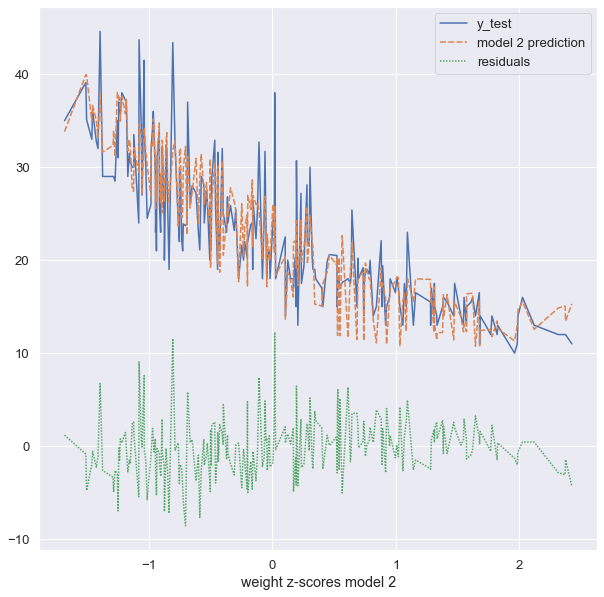

In [51]:
sns.lineplot(data = dfval, ci = None);

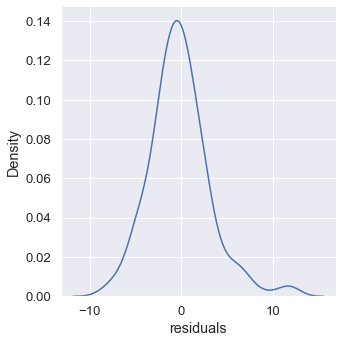

In [52]:
sns.displot(dfval['residuals'], kind = 'kde');

R2 looks good, root mean squared error isn't too off, my residuals are pretty gaussian, and my residuals don't look heteroskadastic. Happy with it :)

**Testing the extra credit model**

Given all that, lets test the extra credit model.

In [53]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,years after 1970,europe,japan,usa,weight z-scores,weight z2
349,4,91.0,68.0,1985,16.0,11,0,1,0,-1.230530,1.514204
254,6,200.0,85.0,2965,15.8,8,0,0,1,-0.040951,0.001677
321,4,108.0,75.0,2265,15.2,10,0,1,0,-0.890650,0.793258
257,6,232.0,90.0,3210,17.2,8,0,0,1,0.256444,0.065764
342,4,135.0,84.0,2385,12.9,11,0,0,1,-0.744987,0.555006
...,...,...,...,...,...,...,...,...,...,...,...
74,8,302.0,140.0,4294,16.0,2,0,0,1,1.572265,2.472016
305,4,151.0,90.0,2670,16.0,9,0,0,1,-0.399038,0.159232
112,4,122.0,85.0,2310,18.5,3,0,0,1,-0.836027,0.698941
379,4,98.0,70.0,2125,17.3,12,0,0,1,-1.060590,1.124851


In [54]:
xEC = x_test[['weight z-scores', 'weight z2', 'cylinders', 'acceleration']]
xEC = sm.add_constant(xEC)
rmseval = rmse(y_test, modelEC.predict(xEC))
rmseval

4.306329649102519

In [55]:
rsquared = y_test.corr(modelEC.predict(xEC))**2
rsquared

0.7012918927028521

In [56]:
dfvalec = pd.DataFrame()
dfvalec["y_test"] = y_test
dfvalec["model ec prediction"] = modelEC.predict(xEC)
dfvalec['weight z-scores model ec'] = x['weight z-scores']
dfvalec['residuals'] = dfvalec['y_test'] - dfvalec['model ec prediction']
dfvalec.index = dfvalec['weight z-scores model ec']
dfvalec = dfvalec.drop(columns = "weight z-scores model ec")
dfvalec

,y_test,model ec prediction,residuals
weight z-scores model ec,,,
-1.230530,34.1,32.464751,1.635249
-0.040951,20.2,21.862174,-1.662174
-0.890650,32.2,29.792204,2.407796
0.256444,19.4,20.966273,-1.566273
-0.744987,30.0,28.149146,1.850854
...,...,...,...
1.572265,13.0,14.097202,-1.097202
-0.399038,28.4,26.989433,1.410567
-0.836027,19.0,30.405980,-11.405980


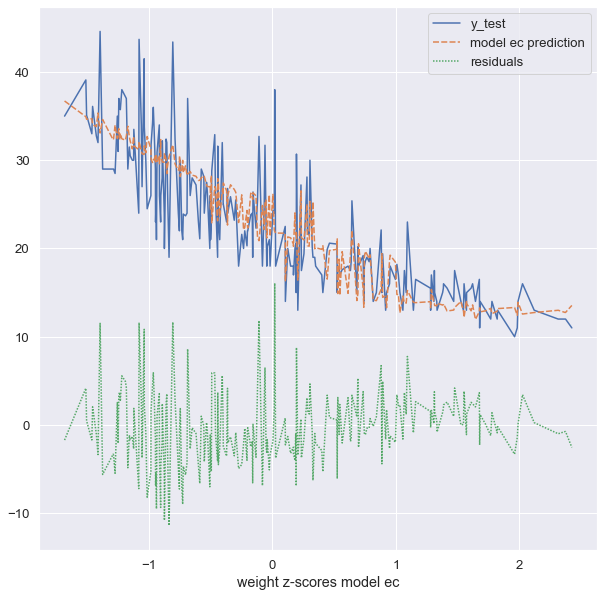

In [57]:
sns.lineplot(data = dfvalec, ci = None);

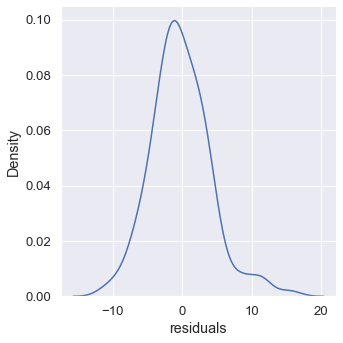

In [58]:
sns.displot(dfvalec['residuals'], kind = 'kde');

All of the results for the extra credit model are worse than the model with years included. The r-squared fell about 0.13 and the mse fell about 1.1 mpg. However, the residuals still are pretty gaussian, which is good. Intuitively, it makes sense that the model that excludes model year would really help out the accuracy of the model, because model year is essentially an instrumental variable for technological progress and innovations that would make the cars more fuel efficient, holding all else constant. In other words, years after 1970 is likely positively correlated with the introduction of more and more efficiency innovations to these cars (I'm not a car guy so I can't really comment on what those innovations are) therefore introducing it into the model creates a variable that can represent those technological improvements.